# LDA Dimension Reduction

Transformed dataset shape: (569, 2)


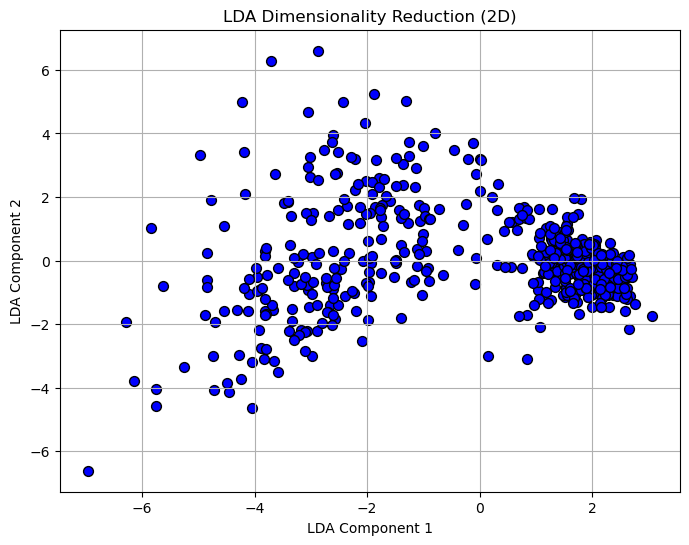

"# Display the correlation matrix\nprint(correlation_matrix)\n\n# Plot the correlation heatmap\nplt.figure(figsize=(6, 4))\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)\nplt.title('Correlation between LDA Components')\nplt.show()"

In [11]:
# 1a) Import relevant libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1b) Load the Dataset
df = pd.read_csv("sample_PCA.csv") 

# Variables (features)
X = df.copy()  

# 2) Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Apply K-Means to generate cluster labels (artificial target variable)
kmeans = KMeans(n_clusters=3, random_state=42)  # Set n_clusters to the desired number of clusters
clusters = kmeans.fit_predict(X_scaled)

# Step 2: Apply LDA for dimensionality reduction
lda = LDA(n_components=2)  # Set n_components to the desired number of dimensions
X_lda = lda.fit_transform(X_scaled, clusters)

# The transformed data can now be used for further analysis or model training
print(f"Transformed dataset shape: {X_lda.shape}")

# If you wish see components you can run this code
# print("comopnent 1:",X_lda[:, 0], "comopnent 2:", X_lda[:, 1])    <----


# FIGURE
# Assuming X_lda is a 2D matrix after applying LDA
plt.figure(figsize=(8, 6))

# Scatter plot of the reduced data
plt.scatter(X_lda[:, 0], X_lda[:, 1], c='blue', edgecolor='k', s=50)

# Add labels and title
plt.title('LDA Dimensionality Reduction (2D)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')

# Display the plot
plt.grid(True)
plt.show()



# Corrlation
# Convert X_lda to a DataFrame for easier handling
lda_df = pd.DataFrame(X_lda, columns=['LDA Component 1', 'LDA Component 2'])

# Calculate the correlation matrix
correlation_matrix = lda_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between LDA Components')
plt.show()

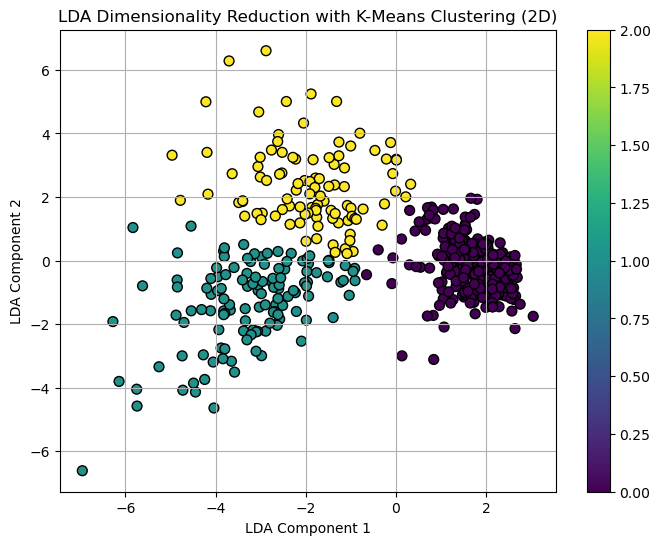

In [10]:
# Clustering Analysis

from sklearn.cluster import KMeans

# Apply K-Means clustering to the LDA-transformed data
kmeans = KMeans(n_clusters=3)  # Set n_clusters to the desired number of clusters
clusters = kmeans.fit_predict(X_lda)

plt.figure(figsize=(8, 6))

# Scatter plot with cluster colors
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)

# Add labels and title
plt.title('LDA Dimensionality Reduction with K-Means Clustering (2D)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')

# Display the plot
plt.grid(True)
plt.colorbar()  # Add a color bar to show cluster numbers
plt.show()
